#### 1. Import the Wine dataset

In [2]:
# Importing dataset from local file
import pandas as pd
wino = pd.read_csv('data/wine.csv')

#### 2. Do an exploratory analysis and pick at least two variables that are measured differently or have a widely different range of values.
We are going to use these variables to try to predict the wine quality(or maybe another, more continuous variable).
    - Explain why you think scaling will have an impact on these variables.
    - Report any interesting observations that resulted from your EDA

In [4]:
# Dataset descriptive stats
wino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Head information from wino dataset
wino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### I am going to take residual sugar(measured in grams) and alcohol (measured as a percent) and see if they have an effect on the density( a chemistry density comparision where water = 1.0) 

Given what little I know about wine.  I know that higher alcohol content will make the resin stick to the the edges of a glass longer (that is why people swirl wine before tasting).  I do believe that sugar tends to make things thicker as well.  Using these assumptions it is resonable to believe that they may have a relation to the density of a wine.  

All of these features have their own measurment systems whether it be grams, content percent or an already normalized scale.

#### 3. Use Train Test Split to split your data.
#### - Create a Multi-Linear Regression and fit it with the UNSCALED x_train & y_train data.
#### - Call predict using your fitted model on your x_test data.
#### - Plot the residuals of your y_test and y_pred
#### - Observe the Summary Statistics.  
TIP: In order to maintain uniformity of your splits specify random_state

In [11]:
#Import TTS from Sklearn CV
from sklearn.cross_validation import train_test_split

# Set X and target Y values
X1 = wino[['residual sugar','alcohol']]
y1 = wino['density']

#TTS
x_test1, x_train1, y_test1, y_train1 = train_test_split(X1, y1, random_state = 57)

In [18]:
import statsmodels.api as sm
# Fitting a stats model linear regression using an Ordinary Least Squares
model = sm.OLS(y_train1,x_train1).fit()

# Predicting y test values using fit model and x test
y_pred1 = model.predict(x_test1)

In [19]:
# Using R^2 to accessing model fit of y true vs y pred
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)

-2936.3422342292097

In [22]:
# Import linear regression from sklearn, set and fit Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LRf = LR.fit(x_train1, y_train1)

#Use x test to predict y test and measure model fit comparing y true and y pred
y_pred1_2 = LRf.predict(x_test1)
r2_score(y_test1, y_pred1_2)

0.38421844947013351

In [51]:
# calling model.score and passing test data will using the test x to create a y pred and compare it to y test(y true)
LRf.score(x_test1,y_test1)
# thus, this returns the same r^2

0.38421844947013351

In [23]:
# Getting the summary statistics for the stats model OLS
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.109e+04
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:24:09   Log-Likelihood:                 368.20
No. Observations:                 400   AIC:                            -732.4
Df Residuals:                     398   BIC:                            -724.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
residual sugar     0.0096      0.004      2.180      0.030         0.001     0.018
alcohol            0.0932      0.001     81.761      0.000         0.091     0.095
==============================================================================
Omnibus:                       69.428   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.032
Skew:                          -1.075   Prob(JB):                     3.48e-24
Kurtosis:                       4.364   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - SM OLS R^2    : -2936.34  (calculated the same as SKLearn r2)
##### - Summary R^2   : 0.991     (this is assessing the data available, train data and determining how well the Alcohol and sugars relate to density
##### - SKLearn LR R^2: 0.384     (calculated the same as OLS r2)


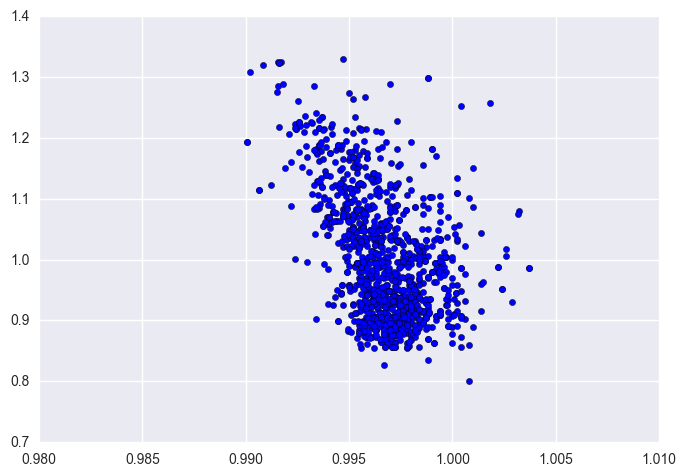

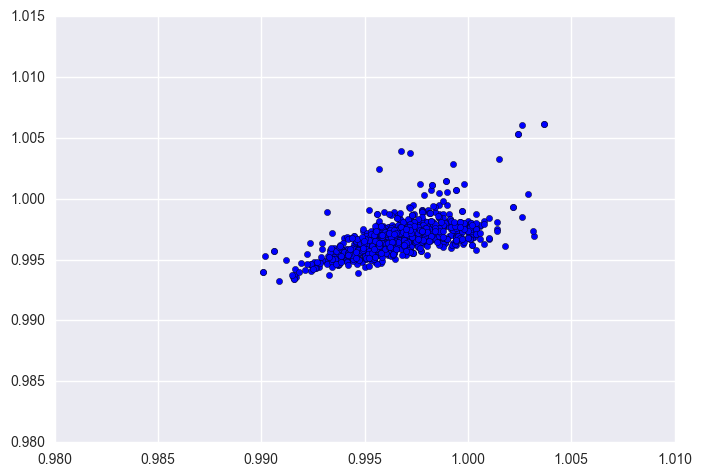

In [29]:
# getting vis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# plotting y true against the y pred of the stats model ols
plt.scatter(x = y_test1, y = y_pred1)
plt.show()
# plotting y true against the y pred of the sklearn lr
plt.scatter(x = y_test1, y = y_pred1_2)
plt.show()

Facinating how the OLS and the LR predicted completely different.  This explains the disparity of the r^2 for those two observations.

#### 4. Scale your two+ selected features using a Min-Max Scaler.

In [36]:
# importing the min-max scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# setting sclaer
MMS = MinMaxScaler()

# fit/transforming the data using the scaler
x_scaled = MMS.fit_transform(X)

#### 5. Use Train Test Split to split your data.
#### - Create a Multi-Linear Regression and fit it with the SCALED x_train & y_train data.
#### - Call predict using your fitted model on your x_test data.
#### - Plot the residuals of your y_test and y_pred
#### - Observe the Summary Statistics.  

In [37]:
# TTS
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled, y, random_state = 51)

# fit an ols model with normalized data
model2 = sm.OLS(y_train2,x_train2).fit()

# predict using the model fit with normalized data
y_pred2 = model2.predict(x_test2)

# compare y true and y pred of normalized model
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)
# what is this atrocity?

-51384.279700220221

In [39]:
# import linear regression
from sklearn.linear_model import LinearRegression
# set model
LR2 = LinearRegression()
# fit model
LR2f = LR2.fit(x_train2, y_train2)
# use model to predict y using x
y_pred2_2 = LR2f.predict(x_test2)
# compare y true and y pred
r2_score(y_test2, y_pred2_2)

0.45451955727647286

In [40]:
# normalized model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     2941.
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        21:51:52   Log-Likelihood:                -632.01
No. Observations:                1199   AIC:                             1268.
Df Residuals:                    1197   BIC:                             1278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1513      0.117     18.402      0.000         1.922     2.381
x2             1.9025      0.048     39.775      0.000         1.809     1.996
==============================================================================
Omnibus:                      182.795   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.094
Skew:                          -1.036   Prob(JB):                     3.36e-62
Kurtosis:                       4.174   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

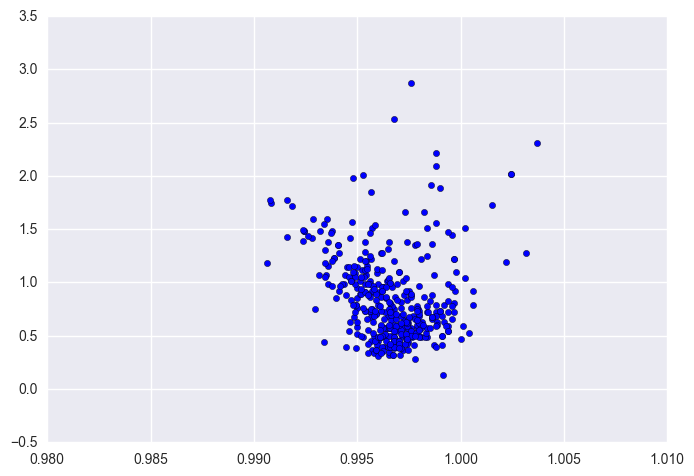

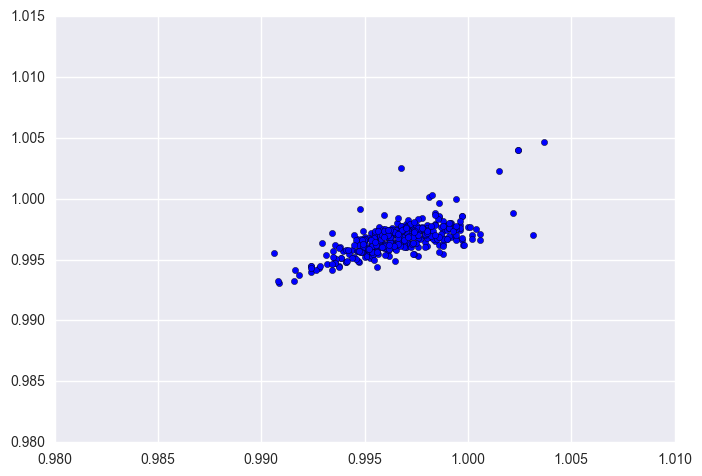

In [41]:
# plotting the y true against the y pred of the statsmodel model using normalized data
plt.scatter(x = y_test2, y = y_pred2)
plt.show()

# plotting the y true against the y pred of the sklearn model using normalized data

plt.scatter(x = y_test2, y = y_pred2_2)
plt.show()

Its hard to tell, but it appears that my points are much more densly plotted in both the Statsmodel and Linear Regression scaled results.  

| Scaled(Norm   | R^2       |   |    R^2     | Unscaled      |
| --------------|-----------|---|------------|---------------|
| SM OLS R^2    | -51384.27 | < | -2936.34   |  SM OLS R^2   |
| Summary R^2   | 0.831     | < | 0.991      | Summary R^2   |
| SKLearn LR R^2| 0.454     | > | 0.384      | SKLearn LR R^2|

#### 6. Repeat Step 4 using standardization to scale your data. 

In [43]:
# scaling data using standardization, standard scaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_scale2 = SS.fit_transform(X)

#### 7. Repeat Step 5 using standardization to scale your data. 

In [45]:
# tts standardized data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_scale2, y, random_state = 51)
# fit standardized data to stats model ols
model3 = sm.OLS(y_train3,x_train3).fit()
# using fit model to predict y using x test
y_pred3 = model3.predict(x_test3)
# comparing the y true to y pred of the stats model ols
from sklearn.metrics import r2_score
r2_score(y_test3, y_pred3)
# oh god, it is worse now

-273492.41113663174

In [46]:
from sklearn.linear_model import LinearRegression
# set lr model
LR3 = LinearRegression()
# fit lr model
LR3f = LR3.fit(x_train3, y_train3)
# use fit lr model to predict y using x test
y_pred3_2 = LR3f.predict(x_test3)
# score model comparing y true vs y pred
r2_score(y_test3, y_pred3_2)

0.45451955727646964

In [47]:
# ols statsmodel summary statistics
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1239
Date:                Tue, 29 Nov 2016   Prob (F-statistic):              0.883
Time:                        22:29:07   Log-Likelihood:                -1697.3
No. Observations:                1199   AIC:                             3399.
Df Residuals:                    1197   BIC:                             3409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0088      0.031     -0.282      0.778        -0.070     0.052
x2            -0.0115      0.029     -0.394      0.694        -0.069     0.046
==============================================================================
Omnibus:                      270.196   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.670
Skew:                           1.242   Prob(JB):                    4.98e-132
Kurtosis:                       5.436   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

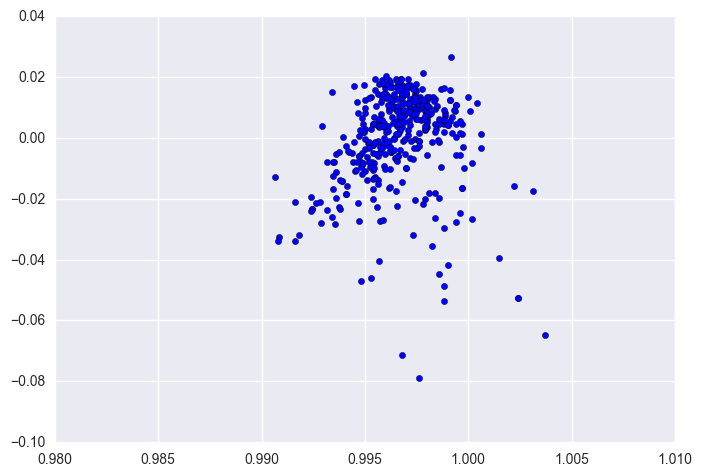

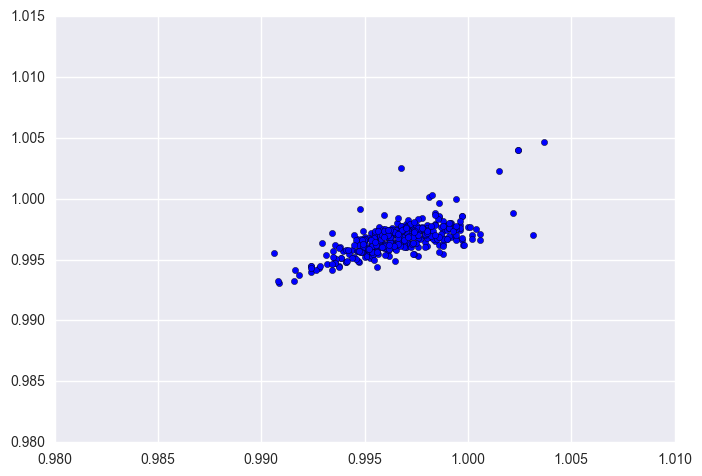

In [48]:
#Standardized Y True vs. StatsModel Y pred
plt.scatter(x = y_test3, y = y_pred3)
plt.show()
#Standardized Y True vs. Sklearn Y Pred
plt.scatter(x = y_test3, y = y_pred3_2)
plt.show()

| Scaled (Std)  | R^2       |   |    R^2     | Unscaled      |
| --------------|-----------|---|------------|---------------|
| SM OLS R^2    | -273492.4 | < | -2936.34   |  SM OLS R^2   |
| Summary R^2   | 0.000     | < | 0.991      | Summary R^2   |
| SKLearn LR R^2| 0.454     | > | 0.384      | SKLearn LR R^2|

#### 8. What, if any, differences do you notice between the outputs of the scaled and unscaled data?  Which method of scaling did you find to have more of an effect on your output? Why do you think this is the case?

There are some stranger things occuring within those Stats model models.  (That is why I stay away from them).  

SKLearn seems to be working fine, making predictive values that are following with smaller variation as well as producing realistic r^2 values.

##### If there is one take away from this, I suggest using sklearn.

#### Bonus:  Show a visual representation of how the distribution of manually scaled data (your scaling function), automatically scaled data (sklearn) and normal data does or does not differ.
(Hint: Use 'plt.show()' to display all visualizations simultaneously)
probably best to do with just 2 variables (x & y)

In [64]:
# Manually standaridizing formula
import numpy as np
def standard(num_list):
    LSX = []
    for item in num_list:
        item_s = (item - np.mean(num_list))/np.std(num_list)
        LSX.append(item_s)
    return LSX

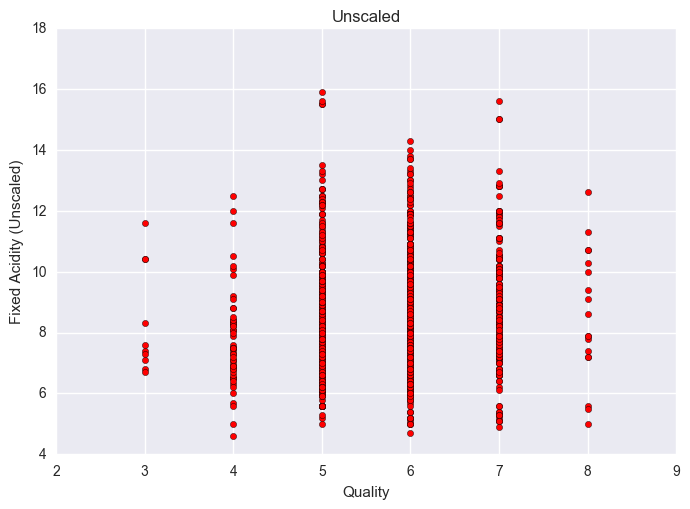

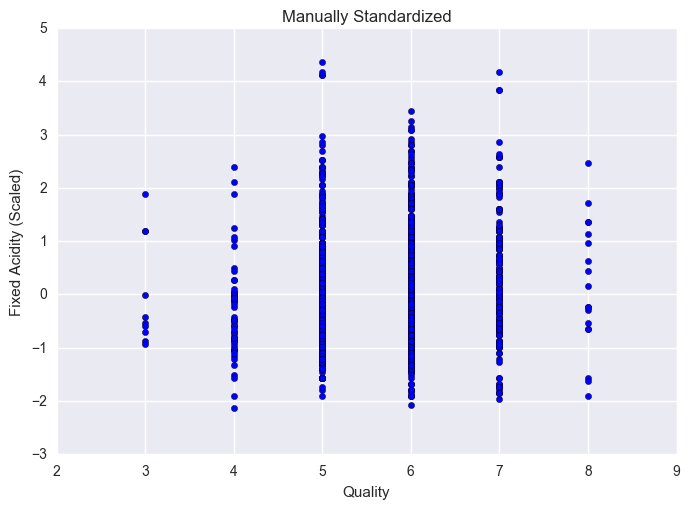

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


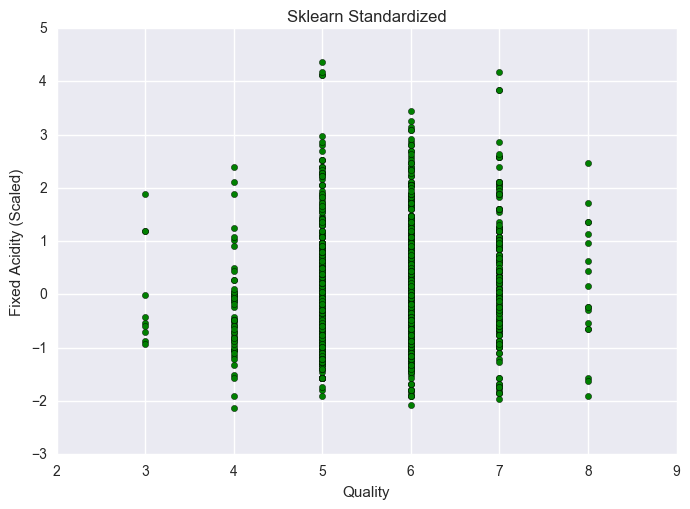

In [66]:
# I am going to scale the Fixed Quality and graph them against quality
x_target = wino['fixed acidity']
y_target = wino['quality']

#Plotting unscaled results
plt.scatter(x = y_target, y = x_target, c = 'r')
plt.title('Unscaled')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity (Unscaled)') 
plt.show()

#Manually sclaing
manually_standard_x = standard(x_target)
# Plotting manually scaled results
plt.scatter(x = y_target, y = manually_standard_x, c = 'b')
plt.title('Manually Standardized')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity (Scaled)') 
plt.show()

# SKlearn scaling
PSS = StandardScaler()
sklearn_standard_x = PSS.fit_transform(x_target)
# Plotting sklearn sclaed results
plt.scatter(x = y_target, y = sklearn_standard_x, c = 'g')
plt.title('Sklearn Standardized')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity (Scaled)') 
plt.show()
